# Neural Network Classification with TensorFlow


## Creating data to view and fit


In [2]:
import tensorflow as tf
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [3]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [5]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [6]:
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

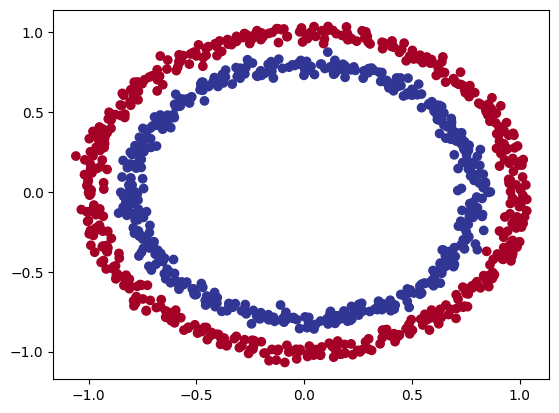

In [7]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

## Input and output shapes


In [8]:
X.shape, y.shape

((1000, 2), (1000,))

In [9]:
len(X), len(y)

(1000, 1000)

In [10]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

1. **Creating a model** 
2. **Compiling a model** 
3. **Fitting a model** 


In [11]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 5s 3ms/step - loss: 5.9177 - accuracy: 0.4800
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 5.1146 - accuracy: 0.4620
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 4.6022 - accuracy: 0.4720
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000


In [13]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_1 but with an extra layer)
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1), # add an extra layer
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0) # set verbose=0 to make the output print less

In [14]:
# Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.5000


[0.6933949589729309, 0.5]

## Improving a model


In [15]:
# Set random seed
tf.random.set_seed(42)

# Create the model (3 layers)
model_3 = tf.keras.Sequential([
  
  tf.keras.layers.Dense(100), # add 100 dense neurons
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), # use Adam instead of SGD
                metrics=['accuracy'])

# Fit the model
model_3.fit(X, y, epochs=100, verbose=1) # fit for 100 passes of the data

Epoch 1/100
32/32 [==============================] - 2s 3ms/step - loss: 3.5433 - accuracy: 0.4520
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 1.0533 - accuracy: 0.4910
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7210 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6998 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6952 - accuracy: 0.4830
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.4910
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6938 - accuracy: 0.4940
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6945 - accuracy: 0.4990
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6943 - accuracy: 0.4880
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6945 - accuracy: 0.4550
Epoch 11/

model isn't even doing better than guessing.


In [16]:
import numpy as np

def plot_decision_boundary(model, X, y):
  
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

 
  x_in = np.c_[xx.ravel(), yy.ravel()] 
  
  y_pred = model.predict(x_in)

  
  if model.output_shape[-1] > 1: 
    print("doing multiclass classification...")
   
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)


  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


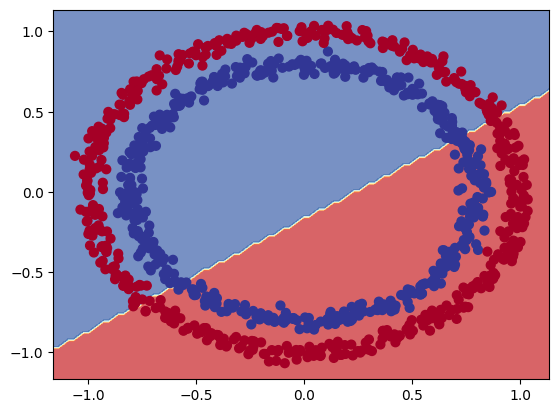

In [17]:
plot_decision_boundary(model_3, X, y)

Looks like model is trying to draw a straight line through the data.

The main issue is our data isn't separable by a straight line.

In a regression problem, our model might work. let's try it.

In [18]:
tf.random.set_seed(42)

# Create some regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train,
            epochs=100)

Epoch 1/100


ValueError: ignored

In [19]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               300       
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1321 (5.16 KB)
Trainable params: 1321 (5.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Oh wait... we compiled our model for a binary classification problem.

No trouble, we can recreate it for a regression problem.

In [20]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Change the loss and metrics of compiled model
model_3.compile(loss=tf.keras.losses.mae, # change the loss function to be regression-specific
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae']) # change the metric to be regression-specific

# Fit the model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train,
            epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 5ms/step - loss: 447.6102 - mae: 447.6102
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 313.3108 - mae: 313.3108
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 182.3118 - mae: 182.3118
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 58.6317 - mae: 58.6317
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 83.0025 - mae: 83.0025
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 86.4671 - mae: 86.4671
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 49.6151 - mae: 49.6151
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 57.7703 - mae: 57.7703
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 50.1641 - mae: 50.1641
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 47.7698 - mae: 47.7698
Epoch 11/100
5/5 [==============================] - 0

It seems like our model is learning something, plot its predictions.

2/2 [==============================] - 0s 4ms/step


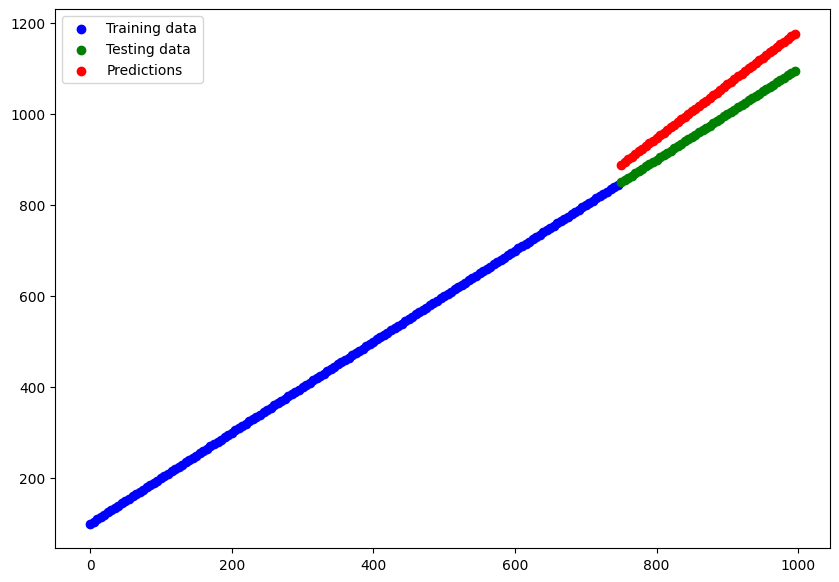

In [21]:
y_reg_preds = model_3.predict(X_reg_test)

plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Testing data')
plt.scatter(X_reg_test, y_reg_preds.squeeze(), c='r', label='Predictions')
plt.legend();

The predictions aren't perfect (if the predictions were perfect, the red would line up with the green)


### Non-linearity

Our classification data (the red and blue circles), we're going to need some non-linear lines.


In [22]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.linear), # 1 hidden layer with linear activation
  tf.keras.layers.Dense(1) # output layer
])

model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # note: "lr" used to be what was used, now "learning_rate" is favoured
                metrics=["accuracy"])

history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 4.2584 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 4.0332 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 3.8635 - accuracy: 0.4970
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 3.6277 - accuracy: 0.4670
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 3.3772 - accuracy: 0.4490
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 3.0635 - accuracy: 0.4460
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 2.7472 - accuracy: 0.4450
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 2.1925 - accuracy: 0.4470
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 1.1191 - accuracy: 0.4790
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.9511 - accuracy: 0.4900
Epoch 11/

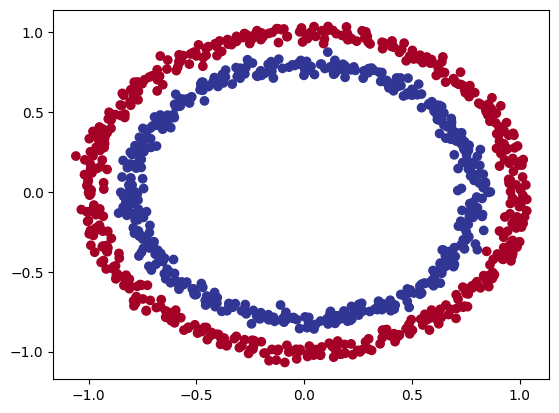

In [23]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


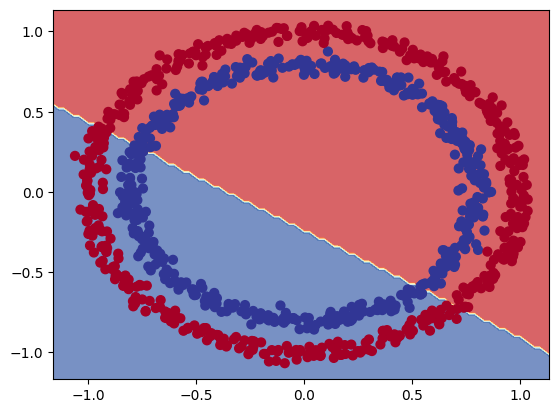

In [24]:
plot_decision_boundary(model_4, X, y)

We're getting a linear line prediction again.

But our data is non-linear...

Add some non-linearity to our model.

To do so, use the `activation` parameter in on of our layers.

In [25]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.relu), # can also do activation='relu'
  tf.keras.layers.Dense(1) # output layer
])

model_5.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

Still not learning...

Increaseing the number of neurons and layers

In [26]:
tf.random.set_seed(42)

# Create a model
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, 4 neurons, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, 4 neurons, ReLU activation
  tf.keras.layers.Dense(1) # ouput layer
])

# Compile the model
model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # Adam's default learning rate is 0.001
                metrics=['accuracy'])

# Fit the model
history = model_6.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 2s 3ms/step - loss: 4.3069 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 4.0916 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 3.9820 - accuracy: 0.4520
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 3.8302 - accuracy: 0.4150
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 3.7048 - accuracy: 0.4500
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 3.5944 - accuracy: 0.4650
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 3.1921 - accuracy: 0.4650
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 2.6196 - accuracy: 0.4680
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 1.3332 - accuracy: 0.4740
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.9951 - accuracy: 0.4750
Epoch 11/

In [27]:
# Evaluate the model
model_6.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6508 - accuracy: 0.5640


[0.6507635116577148, 0.5640000104904175]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


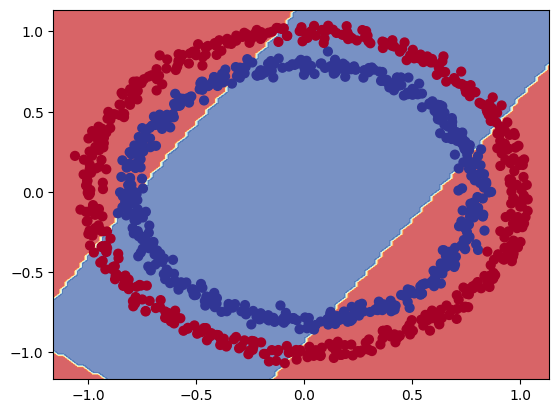

In [28]:
plot_decision_boundary(model_6, X, y)

we'll change the activation function on our output layer. 

In [29]:
tf.random.set_seed(42)

# Create a model
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, ReLU activation
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # ouput layer, sigmoid activation
])

# Compile the model
model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history = model_7.fit(X, y, epochs=100, verbose=0)

In [30]:
model_7.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.2082 - accuracy: 0.9950


[0.20816797018051147, 0.9950000047683716]

looks like model is getting some better results.

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


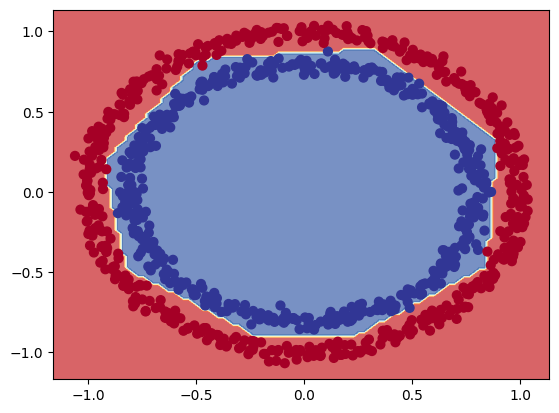

In [31]:
plot_decision_boundary(model_7, X, y)

In [32]:
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

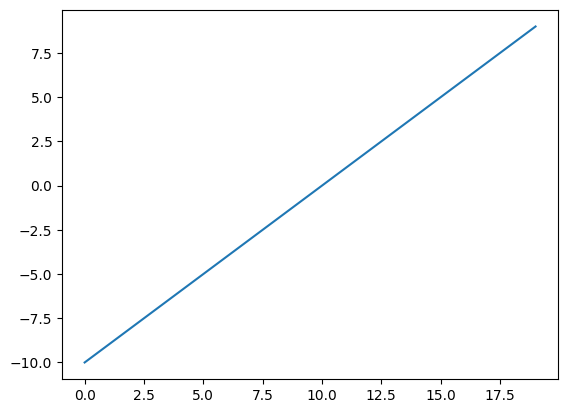

In [33]:
plt.plot(A);

In [34]:
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

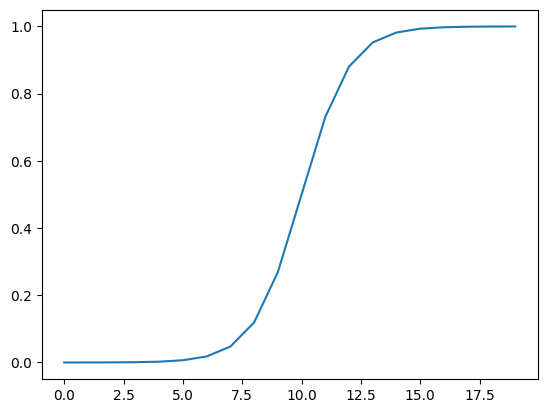

In [35]:
plt.plot(sigmoid(A));

In [36]:
def relu(x):
  return tf.maximum(0, x)

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

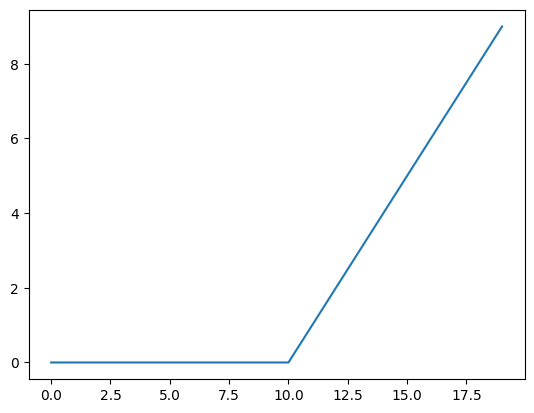

In [37]:
# Plot ReLU-modified tensor
plt.plot(relu(A));

In [38]:
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [39]:
# Does the linear activation change anything?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

We've been evaluating our model on the same data it was trained on.

A better approach would be to split our data into training, validation (optional) and test sets.

we'll train our model on the training set (find patterns in the data).

In [40]:
len(X)

1000

In [41]:
X_train, y_train = X[:800], y[:800] # 80% of the data for the training set
X_test, y_test = X[800:], y[800:] # 20% of the data for the test set

X_train.shape, X_test.shape 

((800, 2), (200, 2))

Great, now we've got training and test sets, let's model the training data and evaluate what our model has learned on the test set.

In [42]:
tf.random.set_seed(42)

# Create the model 
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"), # hidden layer 1, using "relu" for activation (same as tf.keras.activations.relu)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") # output layer, using 'sigmoid' for the output
])

# Compile the model
model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # increase learning rate 
                metrics=['accuracy'])

# Fit the model
history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 3ms/step - loss: 0.6902 - accuracy: 0.5075
Epoch 2/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6878 - accuracy: 0.5325
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6862 - accuracy: 0.5200
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6830 - accuracy: 0.5462
Epoch 5/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6770 - accuracy: 0.5700
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6676 - accuracy: 0.5450
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6511 - accuracy: 0.6650
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6341 - accuracy: 0.7075
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6085 - accuracy: 0.7588
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5821 - accuracy: 0.7538
Epoch 11/25
25/25 [

In [43]:
loss, accuracy = model_8.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.2052 - accuracy: 0.9700
Model loss on the test set: 0.20516908168792725
Model accuracy on the test set: 97.00%


313/313 [==============================] - 0s 1ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


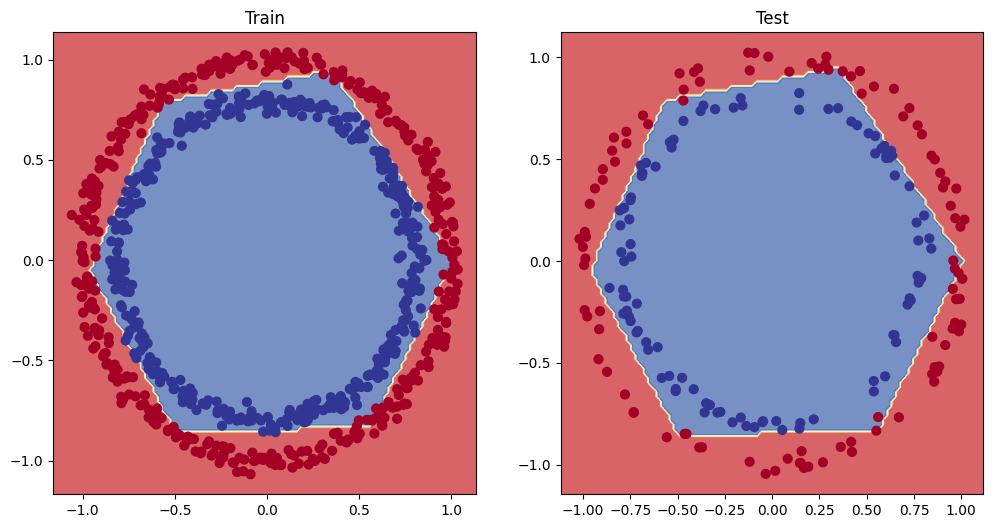

In [44]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show()

### Plot the loss curves

how the performance change once every epoch?

To figure this out, we can check the **loss curves** (**learning curves**).


In [45]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.690183,0.50750
1,0.687798,0.53250
2,0.686171,0.52000
3,0.683011,0.54625
4,0.677036,0.57000
5,0.667617,0.54500
6,0.651129,0.66500
7,0.634132,0.70750
8,0.608484,0.75875
9,0.582073,0.75375


Text(0.5, 1.0, 'Model_8 training curves')

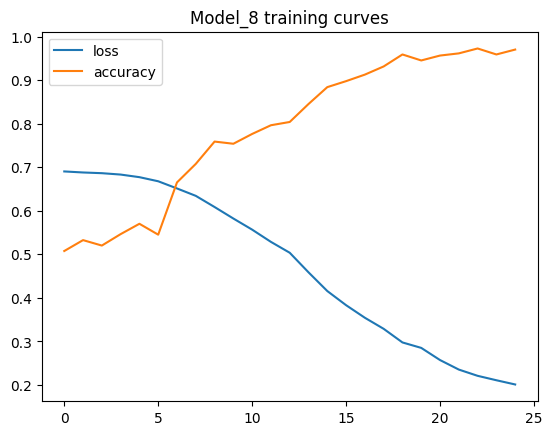

In [46]:
pd.DataFrame(history.history).plot()
plt.title("Model_8 training curves")

### Finding the best learning rate
The most important hyperparameter tune for neural network models is the **learning rate**.



In [47]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

model_9.compile(loss="binary_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) 

history = model_9.fit(X_train,
                      y_train,
                      epochs=100,
                      callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.6918 - accuracy: 0.5088 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6918 - accuracy: 0.5038 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6917 - accuracy: 0.5038 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6917 - accuracy: 0.5025 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6917 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6916 - accuracy: 0.5050 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6915 - accuracy: 0.5088 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6915 - accuracy: 0.5075 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss:

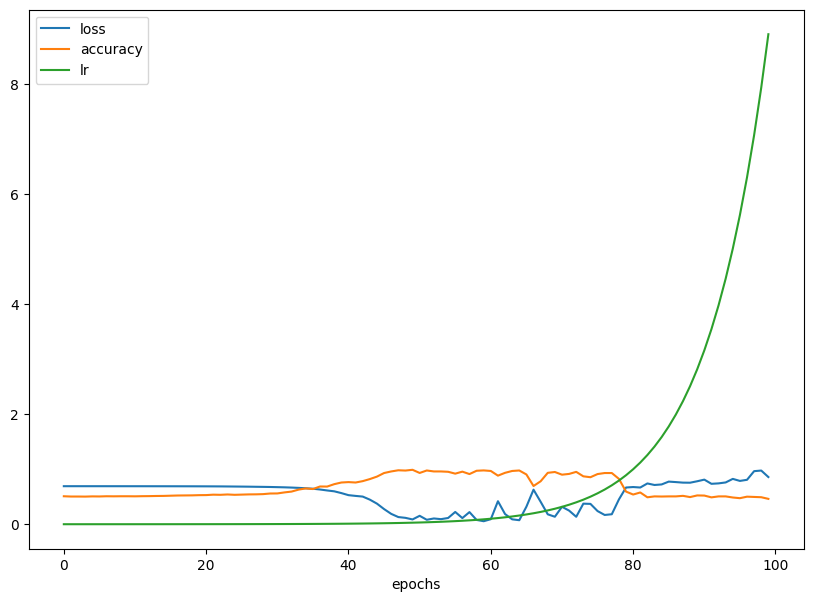

In [48]:
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs");

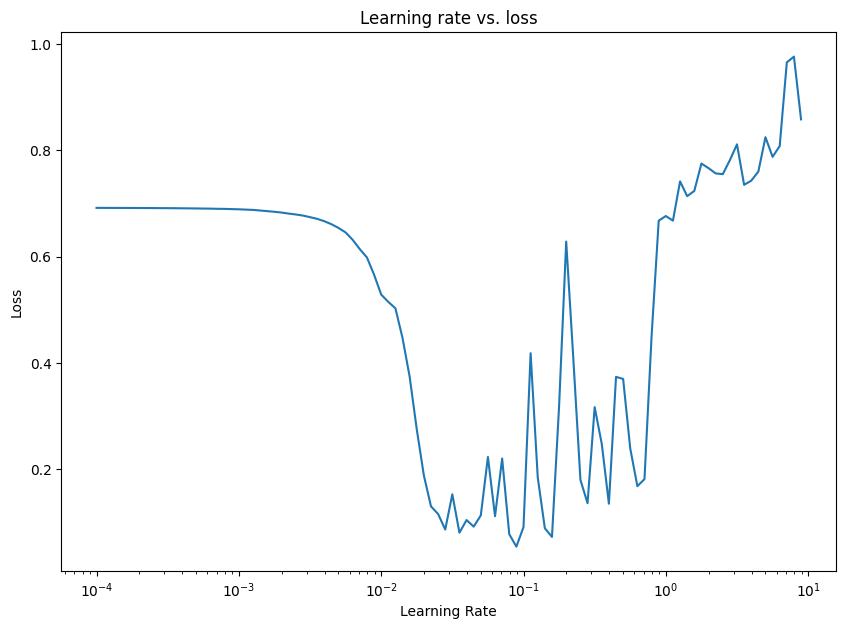

In [49]:
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"]) 
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

Figure out the ideal value of the learning rate, the rule of thumb is to take the learning rate value where the loss is still decreasing but not quite flattened out (usually about 10x smaller than the bottom of the curve).

In this case, our ideal learning rate ends up between `0.01` ($10^{-2}$) and `0.02`.


Estimated the ideal learning rate use 0.02 for model

In [51]:
tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02), # to adjust the learning rate,need to use tf.keras.optimizers.Adam (not "adam")
                metrics=["accuracy"])

history = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 2s 3ms/step - loss: 0.6844 - accuracy: 0.5650
Epoch 2/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6692 - accuracy: 0.6612
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6408 - accuracy: 0.7250
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5839 - accuracy: 0.7812
Epoch 5/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5135 - accuracy: 0.8250
Epoch 6/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4106 - accuracy: 0.9187
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 0.3194 - accuracy: 0.9513
Epoch 8/20
25/25 [==============================] - 0s 3ms/step - loss: 0.2379 - accuracy: 0.9762
Epoch 9/20
25/25 [==============================] - 0s 3ms/step - loss: 0.1835 - accuracy: 0.9850
Epoch 10/20
25/25 [==============================] - 0s 3ms/step - loss: 0.1439 - accuracy: 0.9925
Epoch 11/20
25/25 [

In [52]:
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0425 - accuracy: 1.0000


[0.042508091777563095, 1.0]

see how the predictions look.

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


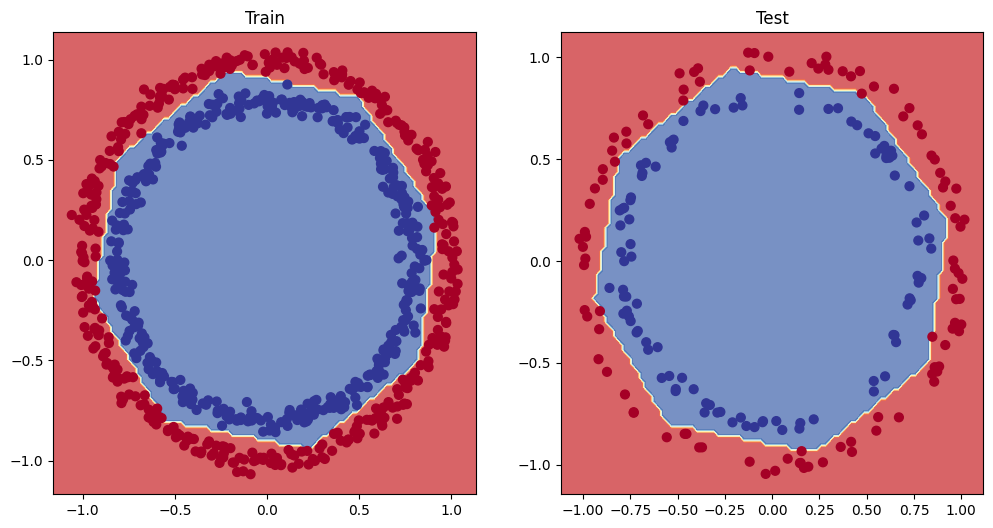

In [53]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show()

In [54]:
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.0425 - accuracy: 1.0000
Model loss on test set: 0.042508091777563095
Model accuracy on test set: 100.00%


In [58]:
from sklearn.metrics import confusion_matrix

y_preds = model_10.predict(X_test)

confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 2ms/step


ValueError: ignored

Ahh, it seems our predictions aren't in the format they need to be.

Let's check them out.

In [59]:
# View the first 10 predictions
y_preds[:10]

array([[0.9740965 ],
       [0.9740965 ],
       [0.9740965 ],
       [0.9740965 ],
       [0.47072026],
       [0.00771922],
       [0.9740965 ],
       [0.00127994],
       [0.9740965 ],
       [0.00113649]], dtype=float32)

What about our test labels?

In [60]:
# View the first 10 test labels
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

need to get predictions into the binary format.

In their current format, they're in a form called **prediction probabilities**.


In [61]:
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [62]:
confusion_matrix(y_test, tf.round(y_preds))

array([[101,   0],
       [  0,  99]])

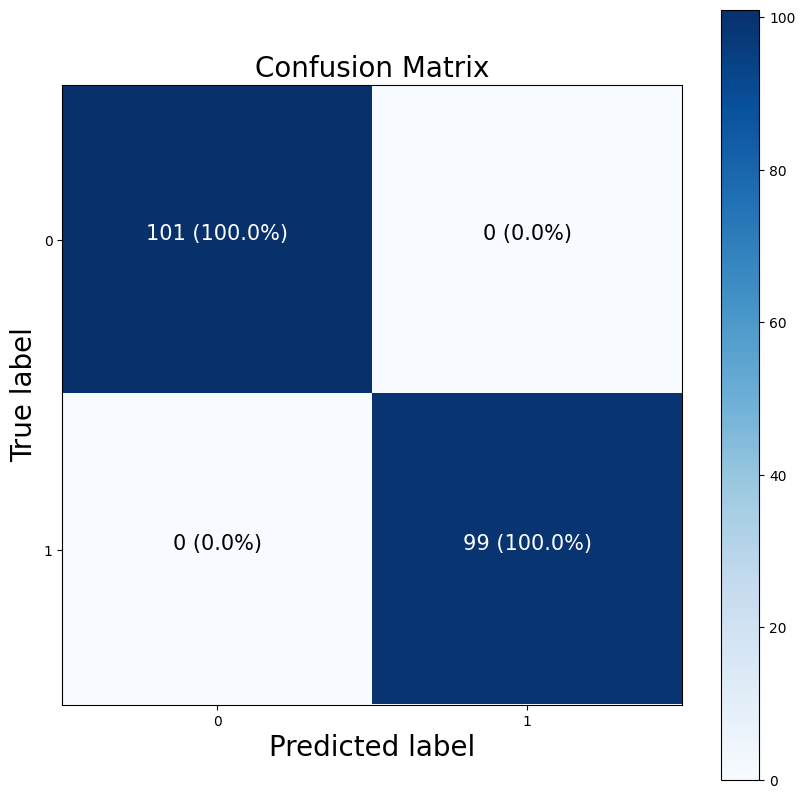

In [63]:
import itertools

figsize = (10, 10)

cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] 
n_classes = cm.shape[0]

fig, ax = plt.subplots(figsize=figsize)
cax = ax.matshow(cm, cmap=plt.cm.Blues) 
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)